In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

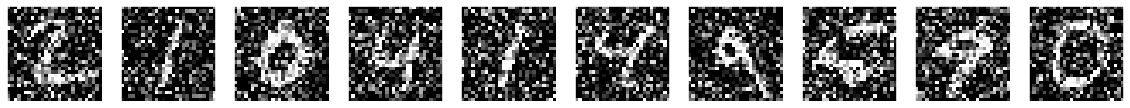

In [4]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
import keras
import keras.layers as layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/30
469/469 [==============================] - 75s 160ms/step - loss: 0.1264 - val_loss: 0.1145
Epoch 2/30
469/469 [==============================] - 73s 155ms/step - loss: 0.1120 - val_loss: 0.1075
Epoch 3/30
469/469 [==============================] - 62s 133ms/step - loss: 0.1066 - val_loss: 0.1041
Epoch 4/30
469/469 [==============================] - 68s 144ms/step - loss: 0.1040 - val_loss: 0.1022
Epoch 5/30
469/469 [==============================] - 68s 145ms/step - loss: 0.1023 - val_loss: 0.1006
Epoch 6/30
469/469 [==============================] - 68s 144ms/step - loss: 0.1010 - val_loss: 0.0997
Epoch 7/30
469/469 [==============================] - 59s 126ms/step - loss: 0.1001 - val_loss: 0.0992
Epoch 8/30
469/469 [==============================] - 65s 138ms/step - loss: 0.0994 - val_loss: 0.0981
Epoch 9/30
469/469 [==============================] - 62s 132ms/step - loss: 0.0988 - val_loss: 0.0975
Epoch 10/30
469/469 [==============================] - 63s 135ms/step - l

In [10]:
x_test_denoised = autoencoder.predict(x_test_noisy)

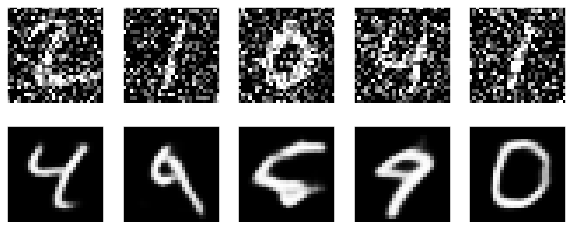

In [39]:
plt.figure(figsize=(10, 4))

for i in range(1, 6):
    ax = plt.subplot(2, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

for i in range(6, 11):
    ax = plt.subplot(2, 5, i)
    plt.imshow(x_test_denoised[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.savefig('figures/denoised_mnist.png', dpi=200)
plt.show()